# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [41]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import openweathermapy as ow
from citipy import citipy
from scipy.stats import linregress


# Import API key
from config import weather_api_key

## Generate Cities List

In [26]:
# Create empty lists for lat and lng values and for cities
lat_lngs = [] 
cities = []

# Using google I found that Latitudes range form -90 to 90 and longitudes range from -180 to 180
# Generate random latitude and longitudes 
# I will need at least 1200 randoms to get 500+ cities
lat = np.random.uniform(low=-90.000, high=90.000, size=5)
lng = np.random.uniform(low=-180.000, high=180.000, size=5)
# Found the zip function to combine the lat and lng lists https://www.saltycrane.com/blog/2007/12/iterating-through-two-lists-in-parallel/
lat_lngs = zip(lat,lng)

# Find the nearest city to each lat and lng combo
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # Check that the city is unique before adding it to our cities list
    if city not in cities:
        cities.append(city)
# print length of cities list to verify we have at least 500
len(cities)

5

643

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [27]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&"

# Create empty list to hold city data
city_data = []
city_num = 1
# Print message
print('Beginning Data Retreival')
print('----------------------------')
# loop through each city and collect their weather data
for city in cities:
    query_url = f"{url}q={city}&appid={weather_api_key}"
    print(f"Processing Record {city_num} | {city}")
    city_num += 1
    # Get weather data
    weather_data = requests.get(query_url).json()

    try:
        lat = weather_data['coord']['lat']
        lng = weather_data['coord']['lon']
        max_temp = weather_data['main']['temp_max']
        humidity = weather_data['main']['humidity']
        cloudiness =  weather_data['clouds']['all']
        wind_speed = weather_data['wind']['speed']
        country = weather_data['sys']['country']
        date = weather_data['dt']
        city_data.append({
            'City': city,
            'Lat': lat,
            'Lng': lng,
            'Max Temp': max_temp,
            'Humidity': humidity,
            'Cloudiness': cloudiness,
            'Wind Speed': wind_speed,
            'Country': country,
            'Date': date
            })
    except:
        print("City not found. Skipping...")

print('-----------------------------')
print('Data Retrieval Complete')
print('-----------------------------')

Beginning Data Retreival
----------------------------
Processing Record 1 | codrington
Processing Record 2 | victoria
Processing Record 3 | mocuba
Processing Record 4 | butaritari
Processing Record 5 | georgetown
-----------------------------
Data Retrieval Complete
-----------------------------


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | yerbogachen
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | touba
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | rio grande
Processing Record 7 of Set 1 | ibra
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | nemuro
Processing Record 12 of Set 1 | morgan city
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | kawalu
Processing Record 15 of Set 1 | hami
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | hjallerup
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | rangapara
Processing Record 23 of Set 1 | hithadho

Processing Record 36 of Set 4 | chimbote
Processing Record 37 of Set 4 | kanor
Processing Record 38 of Set 4 | san pedro de uraba
Processing Record 39 of Set 4 | taphan hin
Processing Record 40 of Set 4 | upernavik
Processing Record 41 of Set 4 | matagami
Processing Record 42 of Set 4 | terme
Processing Record 43 of Set 4 | coria
Processing Record 44 of Set 4 | pallasovka
Processing Record 45 of Set 4 | asyut
Processing Record 46 of Set 4 | cockburn town
Processing Record 47 of Set 4 | osypenko
Processing Record 48 of Set 4 | sioux lookout
Processing Record 49 of Set 4 | gotsu
Processing Record 0 of Set 5 | abadan
Processing Record 1 of Set 5 | lewistown
Processing Record 2 of Set 5 | toftir
City not found. Skipping...
Processing Record 3 of Set 5 | fortuna
Processing Record 4 of Set 5 | ostersund
Processing Record 5 of Set 5 | calafell
Processing Record 6 of Set 5 | panguna
Processing Record 7 of Set 5 | nantucket
Processing Record 8 of Set 5 | la ronge
Processing Record 9 of Set 5 | 

City not found. Skipping...
Processing Record 28 of Set 8 | porto walter
Processing Record 29 of Set 8 | horsham
Processing Record 30 of Set 8 | maraa
Processing Record 31 of Set 8 | vila franca do campo
Processing Record 32 of Set 8 | garoua
Processing Record 33 of Set 8 | kampot
Processing Record 34 of Set 8 | marawi
Processing Record 35 of Set 8 | egvekinot
Processing Record 36 of Set 8 | liverpool
Processing Record 37 of Set 8 | sanandaj
Processing Record 38 of Set 8 | tabou
Processing Record 39 of Set 8 | kavieng
Processing Record 40 of Set 8 | cap malheureux
Processing Record 41 of Set 8 | logan
Processing Record 42 of Set 8 | klaksvik
Processing Record 43 of Set 8 | sisimiut
Processing Record 44 of Set 8 | whyalla
Processing Record 45 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 46 of Set 8 | hailar
Processing Record 47 of Set 8 | ajdabiya
Processing Record 48 of Set 8 | saint-georges
Processing Record 49 of Set 8 | hoopstad
Processing Record 0 of Set 9 

Processing Record 19 of Set 12 | barra dos coqueiros
Processing Record 20 of Set 12 | provideniya
Processing Record 21 of Set 12 | norman wells
Processing Record 22 of Set 12 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 23 of Set 12 | follonica
Processing Record 24 of Set 12 | verkhoyansk
Processing Record 25 of Set 12 | henties bay
Processing Record 26 of Set 12 | kudahuvadhoo
Processing Record 27 of Set 12 | bandundu
Processing Record 28 of Set 12 | cascais
Processing Record 29 of Set 12 | dickinson
Processing Record 30 of Set 12 | san benito
Processing Record 31 of Set 12 | kenai
Processing Record 32 of Set 12 | rio pardo de minas
Processing Record 33 of Set 12 | erzin
Processing Record 34 of Set 12 | san carlos del zulia
Processing Record 35 of Set 12 | kyshtovka
Processing Record 36 of Set 12 | zima
Processing Record 37 of Set 12 | khandbari
Processing Record 38 of Set 12 | salyan
Processing Record 39 of Set 12 | saint-joseph
Processing Record 40 of Set 12 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [28]:
weather_df = pd.DataFrame(city_data)
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,codrington,-38.27,141.97,54.00,70,97,8.99,AU,1599757447
1,victoria,22.29,114.16,84.00,79,100,4.00,HK,1599757209
2,mocuba,-16.84,36.99,73.17,62,89,7.96,MZ,1599757447
3,butaritari,3.07,172.79,82.78,78,71,16.51,KI,1599757447
4,georgetown,5.41,100.34,77.00,88,40,2.24,MY,1599757447


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


In [29]:
weather_df[['Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Date']].describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000e+00
mean,-4.868000,113.250000,74.19000,75.400000,79.400000,7.940000,1.599757e+09
std,23.266008,50.874684,12.10988,9.838699,24.744696,5.535373,1.064368e+02
min,-38.270000,36.990000,54.00000,62.000000,40.000000,2.240000,1.599757e+09
25%,-16.840000,100.340000,73.17000,70.000000,71.000000,4.000000,1.599757e+09
50%,3.070000,114.160000,77.00000,78.000000,89.000000,7.960000,1.599757e+09
75%,5.410000,141.970000,82.78000,79.000000,97.000000,8.990000,1.599757e+09
max,22.290000,172.790000,84.00000,88.000000,100.000000,16.510000,1.599757e+09


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [30]:
#  Get the indices of cities that have humidity over 100%.


In [31]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

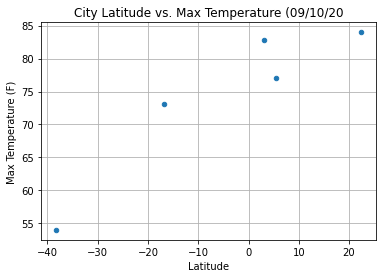

In [32]:
weather_df = weather_df.set_index('City')
lat_temp_df = weather_df[['Lat', 'Max Temp']]
lat_temp_plot = lat_temp_df.plot(kind='scatter',x='Lat',y='Max Temp',grid=True, title='City Latitude vs. Max Temperature (09/10/20')
lat_temp_plot.set_xlabel('Latitude')
lat_temp_plot.set_ylabel('Max Temperature (F)')
plt.show()

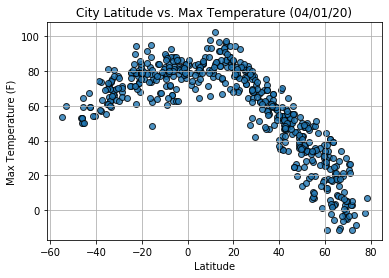

## Latitude vs. Humidity Plot

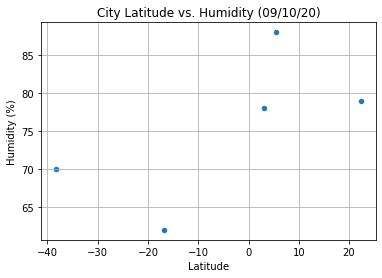

In [35]:
lat_hum_df = weather_df[['Lat', 'Humidity']]
lat_hum_plot = lat_hum_df.plot(kind='scatter',x='Lat',y='Humidity',grid=True, title='City Latitude vs. Humidity (09/10/20)')
lat_hum_plot.set_xlabel('Latitude')
lat_hum_plot.set_ylabel('Humidity (%)')
plt.show()

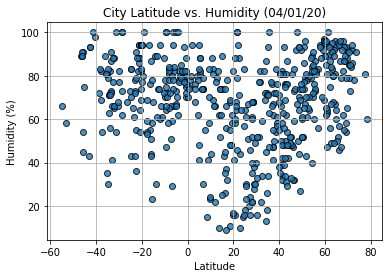

## Latitude vs. Cloudiness Plot

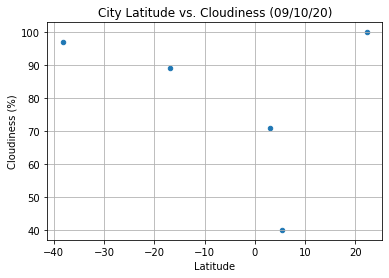

In [37]:
lat_cloud_df = weather_df[['Lat', 'Cloudiness']]
lat_cloud_plot = lat_cloud_df.plot(kind='scatter',x='Lat',y='Cloudiness',grid=True, title='City Latitude vs. Cloudiness (09/10/20)')
lat_cloud_plot.set_xlabel('Latitude')
lat_cloud_plot.set_ylabel('Cloudiness (%)')
plt.show()

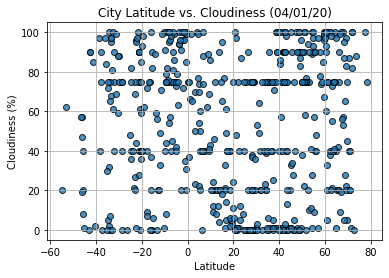

## Latitude vs. Wind Speed Plot

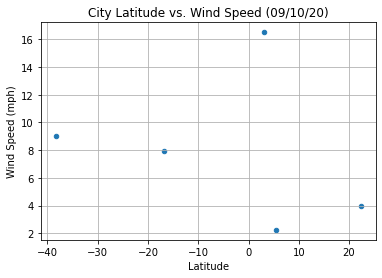

In [39]:
lat_wind_df = weather_df[['Lat', 'Wind Speed']]
lat_wind_plot = lat_wind_df.plot(kind='scatter',x='Lat',y='Wind Speed',grid=True, title='City Latitude vs. Wind Speed (09/10/20)')
lat_wind_plot.set_xlabel('Latitude')
lat_wind_plot.set_ylabel('Wind Speed (mph)')
plt.show()

This scatter plot is comparing the current wind speed of each city to their respective latitudes.

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5443863913093935


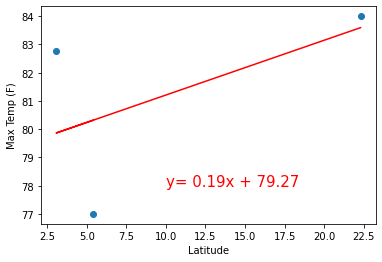

In [44]:
northern_df = weather_df.loc[weather_df['Lat'] >= 0]
n_temp_lat_df = northern_df[['Max Temp', "Lat"]]
x_values = n_temp_lat_df['Lat']
y_values = n_temp_lat_df['Max Temp']
# store linregress values in variables
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
# Declare regress_values
regress_values = x_values * slope + intercept
# Declare line equation variable
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")

# Print the line equation
plt.annotate(line_eq,(10,78), fontsize=15, color='red')
# Add x and y labels
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
# Print rvalue
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.46937863826630627


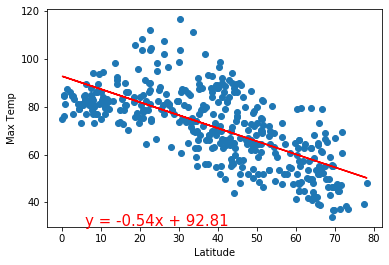

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 1.0


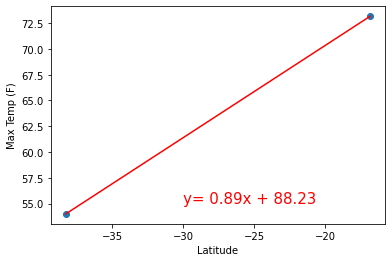

In [46]:
southern_df = weather_df.loc[weather_df['Lat'] < 0]
s_temp_lat_df = southern_df[['Max Temp', "Lat"]]
x_values = s_temp_lat_df['Lat']
y_values = s_temp_lat_df['Max Temp']
# store linregress values in variables
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
# Declare regress_values
regress_values = x_values * slope + intercept
# Declare line equation variable
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")

# Print the line equation
plt.annotate(line_eq,(-30,55), fontsize=15, color='red')
# Add x and y labels
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
# Print rvalue
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.6082708688906918


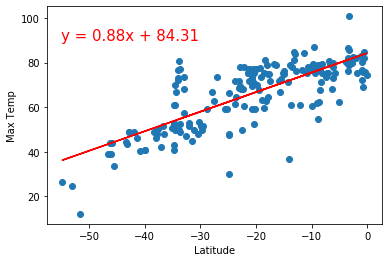

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


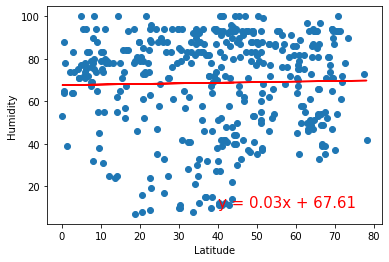

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


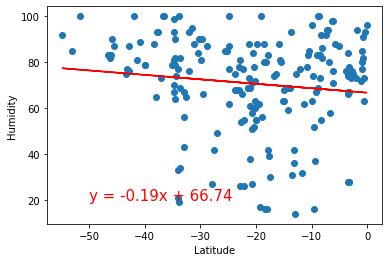

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


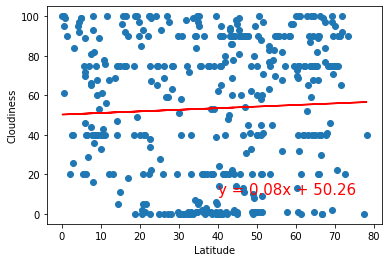

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


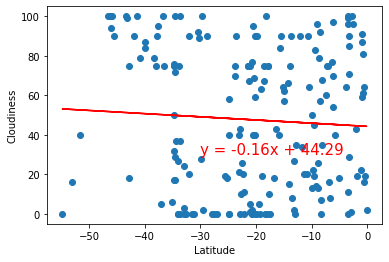

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


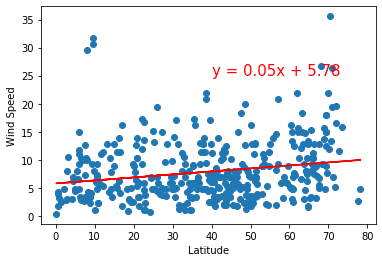

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


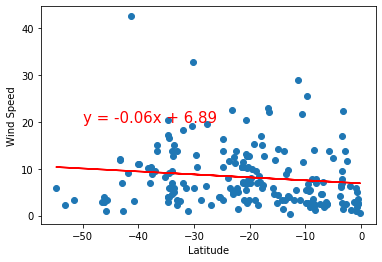